# 4. Multivariate Linear Model

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 4.1 Preparing Data

@Solubility Data

Tetko et al. (2001) and Huuskonen (2000) investigated a set of compounds with corresponding experimental solubility values using complex sets of descriptors. They used linear regression and neural network models to estimate the relationship between chemical structure and solubility. For our analyses, we will use 1267 compounds and a set of more understandable descriptors that fall into one of three groups: 208 binary "fingerprints" that indicate the presence or absence of a particular chemical sub-structure, 16 count descriptors (such as the number of bonds or the number of Bromine atoms) and 4 continuous descriptors (such as molecular weight or surface area).

1267 observation (951+316)

228 mixed variables

www.rdocumentation.org/packages/AppliedPredictiveModeling/versions/1.1-6/topics/solubility

In [3]:
import pandas as pd

data = {}
f_list = ["solTestX", "solTestY", "solTrainX", "solTrainY"]

for i in f_list :
    data[i] = pd.read_csv(i+".csv", index_col=0)
    
print("Data Loaded")

Data Loaded


In [4]:
train_data = data["solTrainX"]
train_label = data["solTrainY"]
test_data = data["solTestX"]
test_label = data["solTestY"]

print("train data : ", train_data.shape)
print("train label : ", train_label.shape)
print("test data : ", test_data.shape)
print("test label : ", test_label.shape)

arr = train_data.columns

train data :  (951, 228)
train label :  (951, 1)
test data :  (316, 228)
test label :  (316, 1)


In [5]:
data["solTestX"].head()

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
20,1,0,0,1,0,0,0,0,1,1,...,1.301297,0.000000,1.098612,0.0,0.375,0.375,0.000000,0.416563,8.245324,8.245324
21,1,0,1,1,0,1,0,0,0,0,...,1.719055,0.456826,1.098612,0.0,0.000,0.000,0.000000,0.915006,9.765805,9.765805
23,0,1,0,0,1,0,0,0,0,1,...,2.642633,0.000000,1.098612,0.0,0.000,0.000,0.693147,0.652185,8.591537,8.591537
25,0,0,1,0,0,1,0,0,0,0,...,2.372566,0.584815,0.000000,0.0,0.000,0.000,0.693147,0.734273,6.568437,6.568437
28,1,1,0,1,1,1,0,1,0,0,...,2.642633,0.584815,0.693147,0.0,0.000,0.000,0.693147,0.650346,10.095894,10.095894


In [6]:
x, y = Variable(torch.from_numpy(train_data.values)).float(), Variable(torch.from_numpy(train_label.values)).float()
x, y

(Variable containing:
   0.0000   1.0000   0.0000  ...   -1.6065   6.8125   6.8125
   0.0000   1.0000   0.0000  ...   -0.4413   9.7538  12.0296
   1.0000   1.0000   1.0000  ...   -0.3849   8.2453   8.2453
            ...               ⋱              ...            
   1.0000   0.0000   1.0000  ...   -1.4838   5.4565   5.4565
   0.0000   0.0000   0.0000  ...   -0.5332   0.0000   0.0000
   0.0000   0.0000   1.0000  ...   -1.3834   3.8371   3.8371
 [torch.FloatTensor of size 951x228], Variable containing:
  -3.9700
  -3.9800
  -3.9900
  -4.0000
  -4.0600
  -4.0800
  -4.0800
  -4.1000
  -4.1000
  -4.1100
  -4.1100
  -4.1200
  -4.1400
  -4.1400
  -4.1500
  -4.1600
  -4.1600
  -4.1600
  -4.1600
  -4.1700
  -4.1800
  -4.1900
  -4.1900
  -4.1900
  -4.2000
  -4.2100
  -4.2200
  -4.2200
  -4.2400
  -4.2400
  -4.2400
  -4.2600
  -4.2700
  -4.2900
  -4.3100
  -4.3100
  -4.3300
  -4.3500
  -4.3500
  -4.3600
  -4.3700
  -4.3700
  -4.4000
  -4.4000
  -4.4300
  -4.4400
  -4.4400
  -4.4500
  -4.4600
  

## 4.2 Define Model

In [7]:
model = nn.Linear(228, 1, bias=True)
print(model)

Linear(in_features=228, out_features=1, bias=True)


In [8]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-5)

In [9]:
for step in range(50000) :
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 5000 == 0 :
        print("Step : ",step, ", Cost : ", cost.data.numpy())

Step :  0 , Cost :  [9.44946]
Step :  5000 , Cost :  [1.874267]
Step :  10000 , Cost :  [1.6200575]
Step :  15000 , Cost :  [1.4726242]
Step :  20000 , Cost :  [1.3528883]
Step :  25000 , Cost :  [1.2535233]
Step :  30000 , Cost :  [1.1703389]
Step :  35000 , Cost :  [1.100168]
Step :  40000 , Cost :  [1.0405431]
Step :  45000 , Cost :  [0.98952115]


In [10]:
model.state_dict()

OrderedDict([('weight', 
              
              Columns 0 to 9 
               0.0115  0.0085 -0.0563 -0.0130  0.0147 -0.0410 -0.0051  0.0290 -0.0721  0.0539
              
              Columns 10 to 19 
              -0.0163 -0.0446 -0.0939 -0.0619  0.0320 -0.0304 -0.0177  0.0251  0.0778  0.0781
              
              Columns 20 to 29 
              -0.0971  0.0368 -0.0457  0.0366 -0.0459  0.0069 -0.0087 -0.0208  0.0548  0.0539
              
              Columns 30 to 39 
               0.0602 -0.0340 -0.0298 -0.0463 -0.0518 -0.0564  0.0308 -0.0567 -0.0555 -0.0096
              
              Columns 40 to 49 
               0.0302  0.0015  0.0691 -0.1098 -0.0002  0.0239  0.0372  0.0010  0.0290 -0.0871
              
              Columns 50 to 59 
              -0.0115  0.0371 -0.0094 -0.0832  0.0431  0.0506  0.0827  0.0005 -0.0880  0.0275
              
              Columns 60 to 69 
              -0.0437  0.0272  0.1148 -0.0342 -0.1025  0.0632  0.0679 -0.0185  0.051

## 4.3 Test Model

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
x_test = Variable(torch.from_numpy(test_data.as_matrix())).float()
y_test = Variable(torch.from_numpy(test_label.as_matrix())).float()

In [13]:
y_predict = model(x_test)

In [14]:
from sklearn import metrics
print("R2 Score = ", metrics.r2_score(y_test.data, y_predict.data))

R2 Score =  0.772582686825706


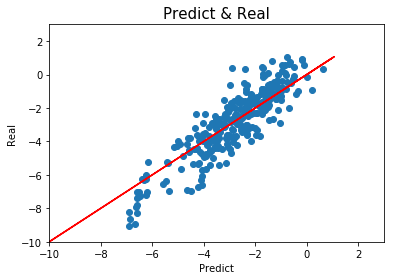

In [15]:
plt.scatter(y_predict.data.numpy(), y_test.data.numpy())

plt.title('Predict & Real', fontdict={'size':15})
plt.xlabel('Predict')
plt.ylabel('Real')

plt.xlim(-10, 3) 
plt.ylim(-10, 3)

plt.plot(y_test.data.numpy(), y_test.data.numpy(), 'r-') 
plt.show()